# **Druggability Assessment**

Author: Anamika Yadav

## Table of Contents:
* [Introduction](#introduction)
  * [Importance of Druggability](#importance)
  * [Concept of Druggability](#concept)
  * [Methods to assess drugabililty](#method)
* [Classification of druggable targets using ESM](#classifcation)
  * [Building a dataset of target proteins](#building)
  * [Fpocket to assess drugability](#fpocket)
  * [ML model to classify the drug target into druggable or undruggable](#ml)

## **Introduction**


**Why is Druggability Important?** <a name="importance"></a>

Before investing a lot of time and money into developing a new drug, scientists want to make sure that the target they are aiming at has a good chance of responding to a drug. If a target is druggable, it means there's a better chance that a drug can bind to it, affect its function, and ultimately help treat the disease.


Despite decades of experimental investigations in the drug discovery domain, about 96% overall failure rate has been recorded in drug development due to the “undruggability” of various identified disease targets, in addition to other challenges. Druggability score is also important as it helps in:  

1.  Prioritizing "Druggable" Pockets: Even within a promising target protein, not all regions are good candidates for drug binding. Druggability assessment tools like fpocket help identify pockets on the protein surface that are suitable for drug interaction. These pockets should be accessible, have favorable chemical properties for drug binding, and not be critical for the protein's normal function.

2.  Reducing Risks of Off-Target Effects: Drugs can sometimes interact with unintended targets besides the intended one, leading to unwanted side effects. Druggability assessment helps choose targets with a lower risk of such off-target interactions. This is achieved by analyzing the protein's structure and sequence to identify potential promiscuous binding sites that could interact with a wider range of molecules.

3. Predicting Potential Safety Issues: Druggability assessment can sometimes highlight potential safety concerns associated with a target protein. For example, if the target is highly similar to a protein involved in a vital biological process, it might be risky to disrupt its function with a drug.

So, let's dive into what druggablity is and how can we classify a target into druggable and undruggable.


### **Concept of Druggability** <a name="concept"></a>


 **Protein Pockets**

Protein pockets, also known as binding pockets or active sites, are regions on the surface of a protein where small molecules, such as drugs, can bind. These pockets are formed by the three-dimensional folding of the protein. Protein pockets are characterized by specific amino acids lining the pocket that interact with the ligands through various forces, such as hydrogen bonds, hydrophobic interactions, van der Waals forces, and ionic bonds. These protein pockets are extremely important as they can be active sites where catalytic activity occurs, or they can be allosteric sites where binding can modulate the protein's function without directly involving the active site.

Identifying protein pockets or binding sites on disease-related proteins helps in selecting targets for new drugs.Once a binding site is known, drugs can be designed to fit precisely into these sites, enhancing their efficacy and reducing side effects.Understanding the binding site helps in modifying drug molecules to increase their affinity and specificity.

Binding sites are central to the concept of druggability as they are the points of interaction between a drug and its target protein. The characteristics of binding sites, such as their geometric and chemical properties, determine whether a protein can be effectively targeted by a drug. By understanding and analyzing these sites, we can identify druggable targets, design and optimize drugs, and predict the druggability of new proteins, ultimately facilitating the development of effective and safe therapeutic agents.

To learn more about binding site [here's](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Binding_Sites.ipynb) another DeepChem tutorial on binding site.




 **Druggability**

Druggability is the measure of whether a biological drug target, like a protein, can be effectively targeted and modulated by a drug to treat a disease. Think of it as evaluating if a protein has the right features to be "hit" by a drug and produce a beneficial effect. The target must have accessible and well-defined binding sites or pockets that can interact with drug molecules. Before measuring druggability let's understand binding sites.


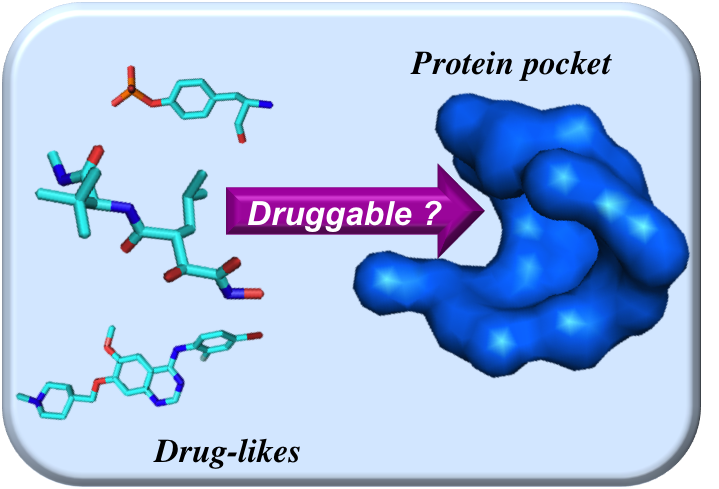

Fig. 1: Druggable pocket correspond to a protein region capable of binding a drug-like molecule.([source](https://pockdrug.rpbs.univ-paris-diderot.fr/images/intro_3D.png))


**Structural property of a druggable pocket**

Structurally, a druggable target must have well-defined binding pockets where potential drugs can bind. These pockets, identified through techniques like X-ray crystallography or computational modeling, should be of suitable size, shape, and chemical composition to accommodate drug-like molecules.

The identification and characterization of binding pockets involve a detailed analysis of their key properties, which include volume, hydrophobicity, and the presence of polar residues. The volume of a binding pocket dictates the size of the ligands that can be accommodated, with larger pockets able to bind larger or more complex molecules, offering more points of interaction. However, excessively large pockets can sometimes be less selective, leading to off-target effects. Hydrophobic regions within the binding pocket interact with non-polar parts of drug molecules through van der Waals forces and hydrophobic interactions, crucial for the binding stability of many drugs, particularly those targeting intracellular proteins where the environment is less aqueous. Polar residues within the pocket can form hydrogen bonds and ionic interactions with the drug, which are often key determinants of binding affinity and specificity. The distribution and accessibility of these polar residues are carefully analyzed to optimize drug design.

Another critical aspect of binding pockets is their dynamic behavior and flexibility. Binding pockets are not always static; they can undergo conformational changes upon ligand binding. This dynamic behavior, known as induced fit, allows the pocket to better accommodate different ligands, enhancing binding affinity and specificity. Molecular dynamics simulations are particularly useful in studying these conformational changes, providing insights into how flexible pockets can adapt to various drug molecules. Understanding this flexibility is essential for designing drugs that can bind effectively even as the protein changes shape.

The balance between hydrophobic and hydrophilic areas within the pocket also influences the type of ligands that can bind effectively. Hydrophobic pockets are better suited for non-polar ligands, while hydrophilic or polar pockets favor ligands that can form hydrogen bonds and ionic interactions. The density and distribution of alpha spheres, geometric constructs used to model the cavities within binding pockets, help in understanding the compactness and accessibility of the pocket. A high alpha sphere density typically indicates a well-defined pocket with potential for strong ligand interactions. Additionally, the surface area of the pocket, particularly the solvent-accessible surface area (SASA), is crucial as it indicates how much of the pocket is exposed and available for binding, providing further insights into the druggability of the target.



**How is druggability assesed?** <a name="method"></a>

**Computational Methods:**

- In Silico Screening: Using computer simulations to predict if a drug can bind to the target.
- Molecular Docking: Simulating how a drug fits into the target's binding site.

**Experimental Methods:**

- High-Throughput Screening (HTS): Testing thousands of small molecules to see if any of them can bind to the target.
- Biophysical Techniques: Measuring the interactions between the target protein and potential drugs in the lab.

## **Classification of drug target into druggable and undruggable**

### **Building a dataset of targets** <a name="building"></a>


In this tutorial we'll use the NRLD dataset which has been widely used for long time to study the druggability. It is a comprehensive, nonredundant data set containing crystal structures of 71 druggable and 44 less druggable proteins  compiled by literature search and data mining published in the paper : [DrugPred: A Structure-Based Approach To Predict Protein Druggability Developed Using an Extensive Nonredundant Data Set](https://pubs.acs.org/doi/10.1021/ci200266d)

The authors have only published the list of PDB code along with the labels. So, we'll first fetch the protein structure using Biopython.

You can also use your own dataset if you have the labels. To obtain the structure of protein from your dataset you can refer the DeepChem tutorial: [Protein Structure Prediction with ESMFold](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Protein_Structure_Prediction_with_ESMFold.ipynb).

In [2]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 23.9 MB/s eta 0:00:00


In [20]:
proteins_list = ['1pwm', '1lox', '3etr', '3f1q', '3ia4', '2cl5', '1uou', '1t46', '1unl', '1q41', '2i1m', '1pmn', '1fk9', '1e66', '1xoz', '1owe', '1r55', '3f0r', '1oq5', '1kzn', '2aa2', '3b68', '1sqn', '1v16', '3jdw', '1ajs', '1wvc', '1kc7', '1mai', '1px4', '1od8', '1bmq', '1bls', '1m0n', '1ec9', '1b74', '1g98', '1e9x', '1hw8', '1sqi', '1r9o', '4cox', '1c14', '2bxr', '2gh5', '1hvy', '1rsz', '1n2v', '1v4s', '1u4d', '1m17', '2dq7', '1qpe', '1qhi', '2fb8', '1ke6', '2br1', '1ywr', '2ivu', '2hiw', '2i0e', '1ywn', '1ig3', '1yvf', '1k8q', '1kvo', '1xm6', '1udt', '1u30', '1r58', '1rwq', '1lpz', '2g24', '1hvr', '1gkc', '1yqy', '1o5r', '1js3', '1k7f', '1j4i', '1vbm', '1rv1', '1gwr', '1m2z', '3d4s', '1ai2', '3pcm', '1d09', '1c9y', '1gpu', '1qmf', '1moq', '1ucn', '1t03', '1qs4', '1fth', '1rnt', '1onz', '1x9d', '1nnc', '1olq', '1jak', '1kts', '1nlj', '1icj', '1hqg', '2gsu', '1g7v', '1f9g', '1qxo', '2gyi', '1o8b', '1cg0']
labels = ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


In [14]:
from Bio.PDB import PDBList
from Bio.PDB import PDBParser
import os


def fetch_protein_structure(pdb_code, save_dir):
    """
    Fetches the protein structure for a given PDB code and saves it to the specified directory.
    Also returns the structure in a dictionary with the PDB code as the key.

    Parameters:
    pdb_code (str): The PDB code of the protein structure to fetch.
    save_dir (str): The directory where the PDB file will be saved.

    Returns:
    dict: A dictionary with the PDB code as the key and the structure as the value.
    """
    try:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        pdbl = PDBList()
        # Retrieve the PDB file and save it with a .pdb extension
        pdb_file_path = pdbl.retrieve_pdb_file(pdb_code, pdir=save_dir, file_format='pdb')
        new_pdb_file_path = os.path.join(save_dir, f"{pdb_code}.pdb")
        os.rename(pdb_file_path, new_pdb_file_path)

        # Parse the PDB file
        parser = PDBParser(PERMISSIVE=1)
        structure = parser.get_structure(pdb_code, new_pdb_file_path)

        # Return the structure in a dictionary
        return {pdb_code: structure}

    except Exception as e:
        print(f'Error fetching structure for PDB code {pdb_code}: {e}')
        return {pdb_code: None}




Specify the save directory and fetch the protein structure

In [36]:
save_directory = '/content/pdb_files/'

for protein in proteins_list:
  pdb_code = protein
  pdb_file_path = fetch_protein_structure(pdb_code, save_directory)


### **Fpocket to find the binding pockets** <a name="fpocket"></a>

Fpocket is a computational tool used to identify and characterize pockets on the surface of proteins. These pockets are potential binding sites for small molecules, making fpocket a valuable tool for drug discovery and development. By identifying and analyzing these pockets, we can better understand protein function and identify targets for drug design.

#### Install the requirements

In [9]:
!apt-get install -y build-essential git
# Clone the fpocket repository
!git clone https://github.com/Discngine/fpocket.git
%cd fpocket
!make

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'fpocket'...
remote: Enumerating objects: 11316, done.
remote: Counting objects: 100% (5152/5152), done.
remote: Compressing objects: 100% (1379/1379), done.
remote: Total 11316 (delta 3897), reused 4572 (delta 3764), pack-reused 6164
Receiving objects: 100% (11316/11316), 127.93 MiB | 21.88 MiB/s, done.
Resolving deltas: 100% (7346/7346), done.
Updating files: 100% (3895/3895), done.
/content/fpocket
cd src/qhull/ && make
make[1]: Entering directory '/content/fpocket/src/qhull'
mkdir -p bin lib
gcc -c -O3 -ansi -Isrc -fpic -Wall -Wcast-qual -Wextra -Wwrite-strings -Wshadow -o src/rbox/rbox.o src/rbox/rbox.c
gcc -c -O3 -ansi -Isrc -fpic -Wall -Wcast-qual -Wextra -Wwrite-strings -Wshadow -o src/libq

#### Run Fpocket for each of the protein and save the output in output directory

In [10]:
import subprocess
def run_fpocket(pdb_file_path):
    """
    Runs fpocket on the given PDB file to find binding pockets.

    Parameters:
    pdb_file_path (str): The path to the PDB file.

    Returns:
    str: The path to the fpocket output directory.
    """
    try:
        # Run fpocket
        command = ["bin/fpocket", "-f", pdb_file_path]
        subprocess.run(command, check=True)

        # Extract the output directory path
        pdb_base = os.path.basename(pdb_file_path).split('.')[0]
        output_dir = f"{pdb_base}_out"
    except subprocess.CalledProcessError as e:
        print(f'Error running fpocket on {pdb_file_path}: {e}')
        return None

Specify the base directory where the pdb files are stored

In [24]:
base_pdb_files = '/content/pdb_files/'

Run Fpocket

In [26]:
for protein in proteins_list:
  protein_structure = os.path.join(base_pdb_files, f'{protein}.pdb')
  run_fpocket(protein_structure)

Let's have a look at the fpocket output



In [27]:
# We'll have a look at the protein /content/pdb_files/1ajs_out

fpocket_info_dir = '/content/pdb_files/1ajs_out/1ajs_info.txt'
with open(fpocket_info_dir, 'r') as file:
  for line in file:
    print(line.strip())


Pocket 1 :
Score : 	0.924
Druggability Score : 	0.535
Number of Alpha Spheres : 	95
Total SASA : 	9.960
Polar SASA : 	7.544
Apolar SASA : 	2.415
Volume : 	493.527
Mean local hydrophobic density : 	21.440
Mean alpha sphere radius :	3.774
Mean alp. sph. solvent access : 	0.449
Apolar alpha sphere proportion : 	0.263
Hydrophobicity score:	26.957
Volume score: 	 4.348
Polarity score:	 14
Charge score :	 4
Proportion of polar atoms: 	49.020
Alpha sphere density : 	5.127
Cent. of mass - Alpha Sphere max dist: 	11.895
Flexibility : 	0.031

Pocket 2 :
Score : 	0.323
Druggability Score : 	0.615
Number of Alpha Spheres : 	83
Total SASA : 	157.049
Polar SASA : 	99.083
Apolar SASA : 	57.966
Volume : 	479.790
Mean local hydrophobic density : 	15.053
Mean alpha sphere radius :	3.795
Mean alp. sph. solvent access : 	0.423
Apolar alpha sphere proportion : 	0.229
Hydrophobicity score:	21.000
Volume score: 	 4.100
Polarity score:	 6
Charge score :	 1
Proportion of polar atoms: 	54.167
Alpha sphere densi

Now, let's find the pocket with highest druggability score in each of the target protein and store it's fearures in a dataframe for training a model in next step

In [28]:
import re
import pandas as pd


def identify_most_druggable_pocket(pocket_df):
  # Find the pocket with the highest druggability score
  pocket_df['Druggability Score'] = pocket_df['Druggability Score'].astype(float)
  best_pocket_df = pocket_df.loc[pocket_df['Druggability Score'].idxmax()]
  best_pocket_df = pd.DataFrame(best_pocket_df).T
  return best_pocket_df

def extract_features(pocket_info):
  pocket_data = []
  # Read the file content line by line
  with open(pocket_info, 'r') as file:
    current_pocket_info = {}
    for line in file:
        if "Pocket" in line:
            if current_pocket_info:
                pocket_data.append(current_pocket_info)
            current_pocket_info = {'Pocket': line.strip()}
        else:
            if ':' in line:
                key, value = line.split(':')
                current_pocket_info[key.strip()] = value.strip()

    # Append the last pocket information
    if current_pocket_info:
        pocket_data.append(current_pocket_info)

  # Convert the list of dictionaries to a DataFrame
  pocket_df = pd.DataFrame(pocket_data)
  pocket_df.drop(columns=['Pocket'], inplace=True)
  return pocket_df





In [29]:
pocket_dataset = {}
for protein in proteins_list:
  pocket_info = f'{base_pdb_files}{protein}_out/{protein}_info.txt'
  pocket_df = extract_features(pocket_info)
  best_pocket_df = identify_most_druggable_pocket(pocket_df)
  pocket_dataset[protein] = best_pocket_df

# Combine all dataframes into one with a new column for the keys
dataset_fpocket = pd.concat(pocket_dataset.values(), keys=pocket_dataset.keys()).reset_index(level=0).rename(columns={'level_0': 'Key'})
dataset_fpocket.rename(columns={'Key': 'pdb code'}, inplace=True)

Add the label's to the dataset

In [31]:
# # Set the key column as the index our dataframe from intial csv file with pdb code and labels and the dataframe we created in previous step
dataset_fpocket.set_index('pdb code', inplace=True)
# dataset.set_index('pdb code', inplace=True)

# # Merge the dataframes on the index to create a datset
# dataset_fpocket = dataset_fpocket.join(dataset, how='outer')



### **Run the classifier model** <a name="ml"></a>

Here, We use random forest algorithm to train our model as it outperformed logistic regression, SVM and pls-DA in the models in my experimentation. However, you are free to use model of your choice.

In [32]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
# X = dataset_fpocket.drop('label', axis=1)
# y = dataset_fpocket['label']
X = dataset_fpocket
y = labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.71      0.83      0.77         6

    accuracy                           0.87        23
   macro avg       0.83      0.86      0.84        23
weighted avg       0.88      0.87      0.87        23



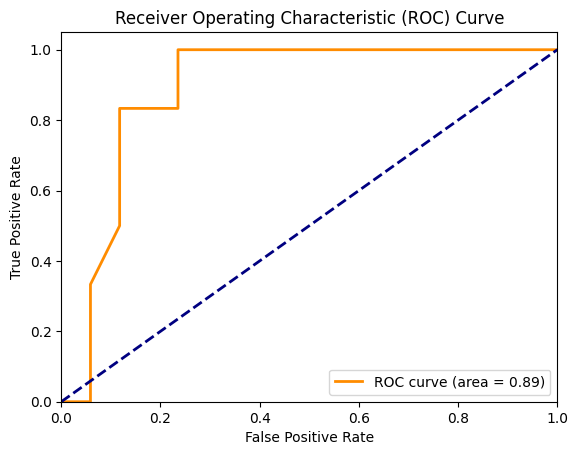

In [33]:

# Calculate the ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
import matplotlib.pyplot as plt
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

To predict druggability of your target protein run an inference on the above trained model
1. Run Fpocket to idenitfy the pockets
2. Idenitfy the pocket with highest druggable score
3. Extract the features of  most druggable feature in the target
2. Run the inference and get the score

In [35]:
fetch_protein_structure('1mbn', '/content/1mbn/')
run_fpocket('/content/1mbn/1mbn.pdb')
output_dir = '/content/1mbn'
pdb_code = '1mbn'

target_pocket_info = f'{output_dir}{pdb_code}_out/{protein}_info.txt'
target_pocket_df = extract_features(pocket_info)
best_pocket_df = identify_most_druggable_pocket(pocket_df)
prediction = label_encoder.inverse_transform(model.predict(best_pocket_df))
print(prediction)

['N']


The predicted label 'N' here means protein target '1mbn' isn't highly druggable.

# Congratulations! Time to join the Community!
Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/cGzwCdrUqS) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!